# Data Loading

In [1]:
import pandas as pd

# Load your sensor data from a CSV file
df = pd.read_csv('distillation-tower.csv')
df.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,513.9653,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,504.5145,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,508.9997,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,514.1794,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,511.0948,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238


# Data Cleaning


In [2]:
# Remove unnecessary columns
columns_to_drop = ['Date', 'InvTemp1', 'InvTemp2', 'InvTemp3', 'InvPressure1', 'Temp11']
df = df.drop(columns_to_drop, axis=1)

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)
df.head()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,Temp7,Temp8,TempC9,FlowC2,Temp9,Temp10,FlowC3,FlowC4,Temp12,VapourPressure
0,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,489.0043,...,1129.6040,522.4728,86.6133,69.9017,461.2371,513.9653,8.6279,10.5988,489.9900,32.5026
1,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,479.0443,...,1082.9395,516.0140,97.6100,69.6900,450.3000,504.5145,8.7662,10.7560,480.2888,34.8598
2,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,485.1326,...,1076.9067,514.6193,88.4967,70.5867,458.8101,508.9997,8.5319,10.5737,486.6190,32.1666
3,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,490.4338,...,1078.9117,519.3823,95.3483,70.2167,462.5252,514.1794,8.6260,10.6695,491.1304,30.4064
4,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,486.1049,...,1087.4271,508.6756,82.9533,69.6567,460.7509,511.0948,8.5939,10.4922,487.6475,30.9238


# Data Augmentation

In [3]:
import numpy as np

def augment_data(original_data, num_augmented_samples, noise_level=0.1):
    augmented_data = []
    for sample in original_data:
        for _ in range(num_augmented_samples):
            noise = np.random.normal(0, noise_level, size=sample.shape)
            augmented_sample = sample + noise
            augmented_data.append(augmented_sample)
    return np.array(augmented_data)

num_augmented_samples = 5
augmented_data = augment_data(df.values, num_augmented_samples)
augmented_data.shape

(1265, 22)

# Normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(augmented_data)
normalized_data

array([[0.50979117, 0.77681797, 0.67118231, ..., 0.94513104, 0.66043666,
        0.18783663],
       [0.50845517, 0.77694851, 0.67045084, ..., 0.93404963, 0.66216183,
        0.1873577 ],
       [0.50971289, 0.77720968, 0.67084379, ..., 0.93737222, 0.66158267,
        0.19161465],
       ...,
       [0.35910809, 0.12897383, 0.31478603, ..., 0.13705471, 0.49432447,
        0.2720851 ],
       [0.35542094, 0.12925263, 0.31427216, ..., 0.11646444, 0.49638876,
        0.2690733 ],
       [0.35094545, 0.12854764, 0.31514067, ..., 0.13806603, 0.49493866,
        0.27251482]])

# Graph Structure and Conversion

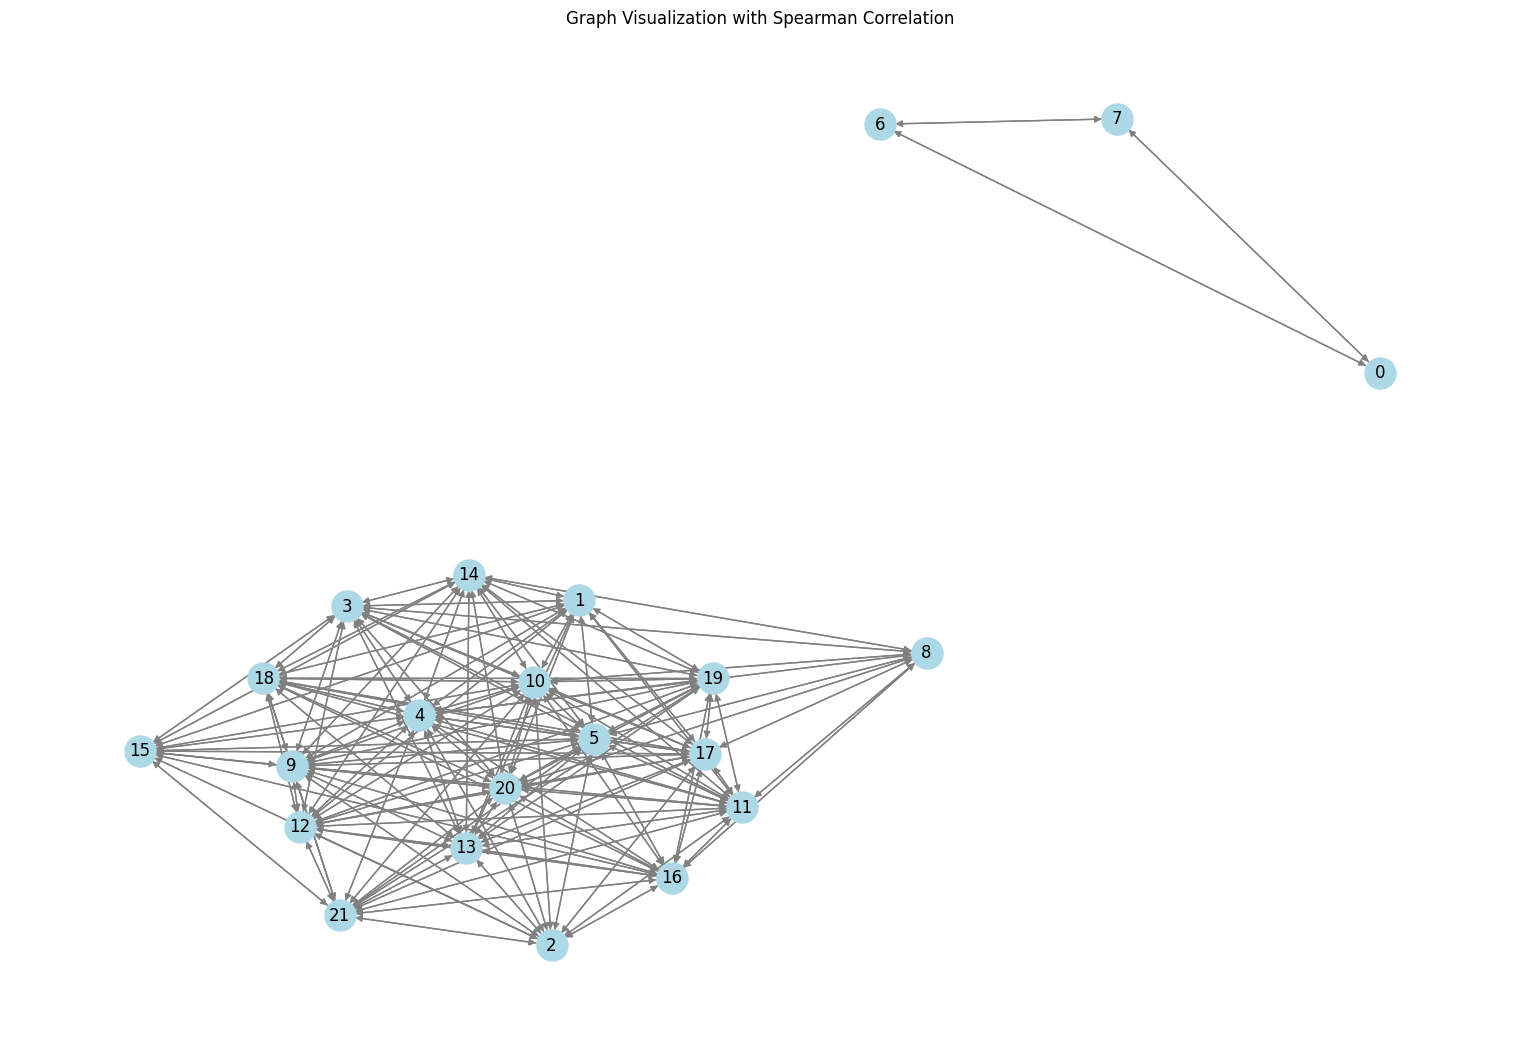

In [5]:
import numpy as np
import scipy.stats as stats
import networkx as nx
import torch
import matplotlib.pyplot as plt

# Compute Spearman correlation matrix
correlation_matrix = stats.spearmanr(normalized_data).correlation

# Create adjacency matrix based on a threshold
threshold = 0.25
adjacency_matrix = np.zeros(correlation_matrix.shape)
for i in range(len(df.columns)):
    for j in range(i + 1, len(df.columns)):
        if abs(correlation_matrix[i, j]) > threshold:
            adjacency_matrix[i, j] = adjacency_matrix[j, i] = 1


# Convert adjacency matrix to edge index
edge_index_np = np.array(np.nonzero(adjacency_matrix))
edge_index_tensor = torch.tensor(edge_index_np, dtype=torch.long)


# Initialize and draw the graph
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph)
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=1)  # k is the optimal distance between nodes
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', edge_color='gray')
plt.title("Graph Visualization with Spearman Correlation")
plt.show()


In [6]:
# Validate the maximum index
num_nodes = len(df.columns)  # This should match the number of features in your data
print("Max node index in edge_index:", edge_index_tensor.max().item())
print("Number of nodes:", num_nodes)

if edge_index_tensor.max().item() >= num_nodes:
    print("Edge index out of bounds detected!")


edge_index_tensor = edge_index_tensor

# Check maximum index in edge_index_tensor
max_index = edge_index_tensor.max()
print("Maximum node index in edge_index:", max_index.item())
print("Number of nodes in training data:", num_nodes)

if max_index >= num_nodes:
    # Adjust edge_index_tensor to remove out-of-bounds indices
    valid_edges = (edge_index_tensor[0] < num_nodes) & (edge_index_tensor[1] < num_nodes)
    edge_index_tensor = edge_index_tensor[:, valid_edges]

# Re-check the maximum index after adjustment
max_index = edge_index_tensor.max()
print("Adjusted maximum node index in edge_index:", max_index.item())

Max node index in edge_index: 21
Number of nodes: 22
Maximum node index in edge_index: 21
Number of nodes in training data: 22
Adjusted maximum node index in edge_index: 21


# Model Definition

In [7]:
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.optim as optim

class GCNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_features_per_sensor):
        super(GCNModel, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_features_per_sensor)
        self.dropout = nn.Dropout(0.5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = F.relu(self.conv1(x, edge_index))
        x = self.dropout(x)
        x = F.relu(self.conv2(x, edge_index))
        x = self.fc(x)
        return x

# Initialize model
num_features = normalized_data.shape[1]
input_dim = len(df.columns)
model = GCNModel(input_dim=input_dim, hidden_dim=16, num_features_per_sensor=num_features)
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

# Model Training

In [8]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data

# Split normalized data into training and testing sets
X_train, X_test = train_test_split(normalized_data, test_size=0.2, random_state=42)

# Prepare torch geometric data for both training and testing using the same edge_index
train_data = Data(x=torch.tensor(X_train, dtype=torch.float32), edge_index=edge_index_tensor)
test_data = Data(x=torch.tensor(X_test, dtype=torch.float32), edge_index=edge_index_tensor)


# Train the model
model.train()
for epoch in range(200):  # Number of epochs
    optimizer.zero_grad()
    output = model(train_data)
    loss = criterion(output, train_data.x)  # Train against the input features
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss {loss.item()}')


def evaluate_model(model, data):
    model.eval()
    with torch.no_grad():
        output = model(data)
        mse_per_sensor = torch.mean((output - data.x)**2, dim=0)
        mae_per_sensor = torch.mean(torch.abs(output - data.x), dim=0)
        average_mse = torch.mean(mse_per_sensor)
        average_mae = torch.mean(mae_per_sensor)
    return mse_per_sensor, mae_per_sensor, average_mse, average_mae

# Evaluate the model on the test and training data
mse_per_sensor_test, mae_per_sensor_test, average_mse_test, average_mae_test = evaluate_model(model, test_data)
mse_per_sensor_train, mae_per_sensor_train, average_mse_train, average_mae_train = evaluate_model(model, train_data)


# Print the results
print("MSE per sensor (test data):", mse_per_sensor_test.tolist())
print("MAE per sensor (test data):", mae_per_sensor_test.tolist())
print("Average MSE (test data):", average_mse_test.item())
print("Average MAE (test data):", average_mae_test.item())

print("MSE per sensor (training data):", mse_per_sensor_train.tolist())
print("MAE per sensor (training data):", mae_per_sensor_train.tolist())
print("Average MSE (training data):", average_mse_train.item())
print("Average MAE (training data):", average_mae_train.item())


Epoch 0: Loss 0.3383137583732605
Epoch 10: Loss 0.07960561662912369
Epoch 20: Loss 0.047990214079618454
Epoch 30: Loss 0.0372982993721962
Epoch 40: Loss 0.033753108233213425
Epoch 50: Loss 0.0320853665471077
Epoch 60: Loss 0.02940913289785385
Epoch 70: Loss 0.027823228389024734
Epoch 80: Loss 0.02645881660282612
Epoch 90: Loss 0.025405948981642723
Epoch 100: Loss 0.02499345876276493
Epoch 110: Loss 0.024036528542637825
Epoch 120: Loss 0.023843036964535713
Epoch 130: Loss 0.02339896932244301
Epoch 140: Loss 0.022713979706168175
Epoch 150: Loss 0.02189328707754612
Epoch 160: Loss 0.021494626998901367
Epoch 170: Loss 0.020561592653393745
Epoch 180: Loss 0.021664781495928764
Epoch 190: Loss 0.02075081132352352
MSE per sensor (test data): [0.03249096870422363, 0.03250226750969887, 0.025792695581912994, 0.039325051009655, 0.022929586470127106, 0.027097031474113464, 0.012607441283762455, 0.013127909041941166, 0.057440903037786484, 0.023469390347599983, 0.028060797601938248, 0.0253041032701730

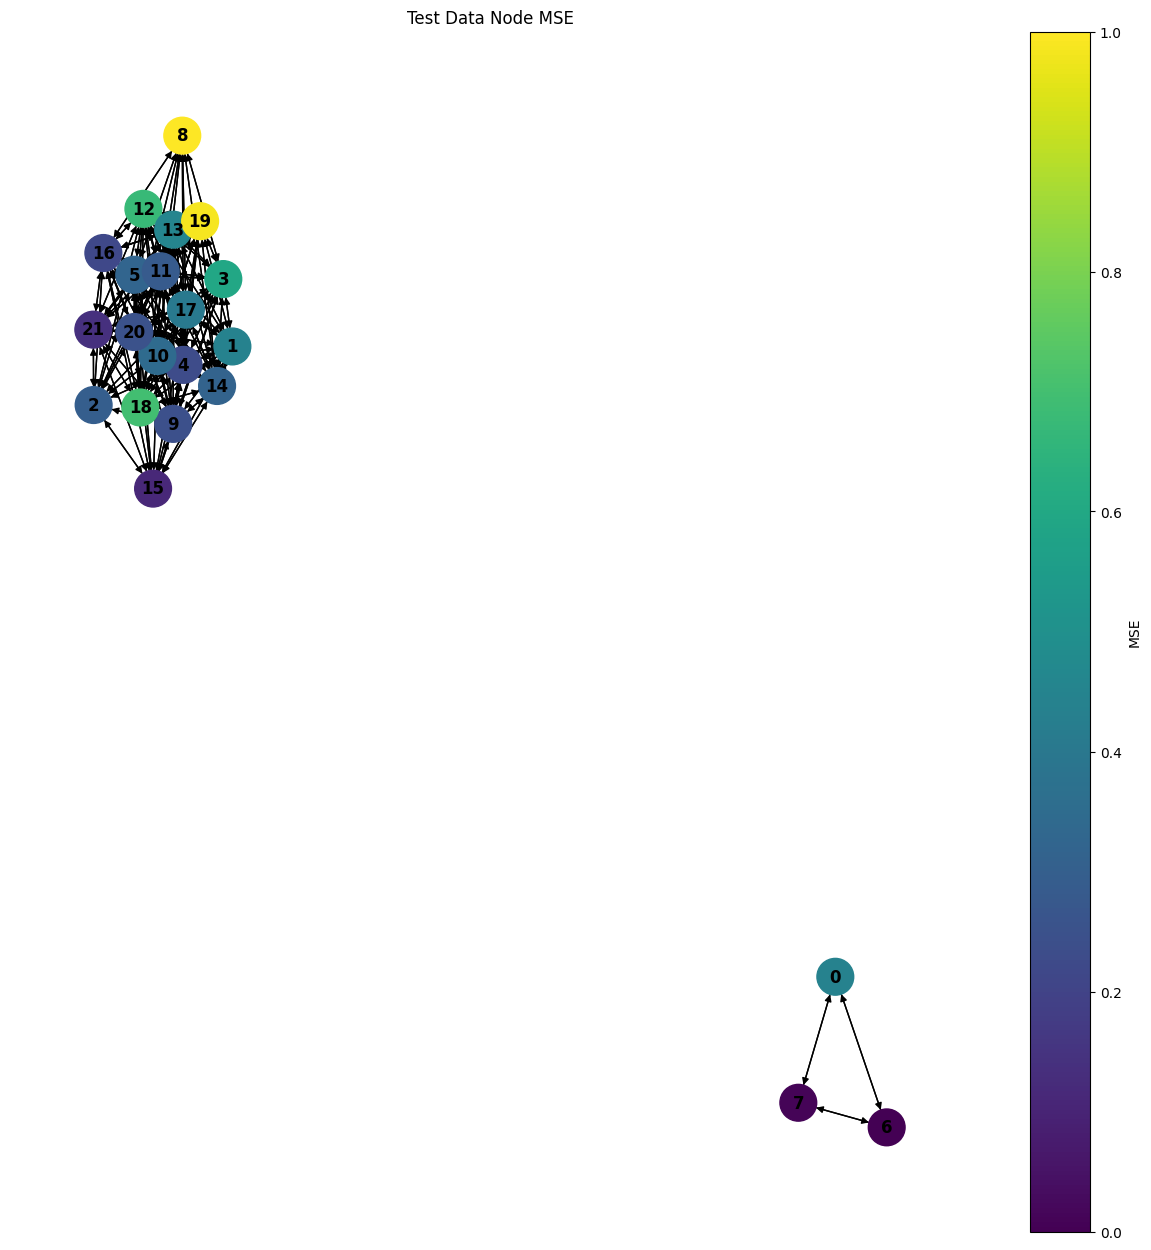

In [9]:
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # Use the same graph 'G' as from training
node_color = mse_per_sensor_test.detach().numpy()
nx.draw(G, pos, node_color=node_color, node_size=700, cmap='viridis', with_labels=True, font_weight='bold')
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), orientation='vertical', label='MSE')
plt.title('Test Data Node MSE')
plt.show()

# Learned Weights

Learned Weights from Conv1:
[[ 1.19782850e-01  8.07106867e-02 -1.02533221e-01 -3.76325011e-01
  -3.39942306e-01  3.94711755e-02 -1.15309209e-01 -3.68451893e-01
  -5.40338196e-02 -1.61033034e-01 -3.64045113e-01 -2.22258046e-01
   2.39009827e-01 -2.04284951e-01 -2.52234966e-01 -5.13022579e-02
   2.54422933e-01 -6.07900172e-02 -7.72673311e-03  2.48234183e-01
   1.59790263e-01  1.16374865e-01]
 [ 7.67369270e-02  3.88860911e-01 -1.85545370e-01  1.76994391e-02
   2.39367485e-01 -3.04479778e-01 -1.88710213e-01  1.17376611e-01
   1.47797167e-01 -4.61167209e-02  1.58497274e-01 -2.03840092e-01
  -1.59770638e-01  3.04263502e-01  3.58096473e-02 -1.57102793e-01
  -3.11270356e-01 -3.96482050e-02  3.49269837e-01  1.42810866e-01
  -1.08568572e-01 -3.26064140e-01]
 [ 2.44572572e-02 -1.36957049e-01  2.11693019e-01  1.32307261e-01
  -2.31828779e-01 -2.39510030e-01  1.64819598e-01  9.04699787e-02
  -1.48101673e-01 -1.34216592e-01 -1.59245413e-02  2.20801190e-01
  -1.36085954e-02  1.57838333e-02 -2.5602871

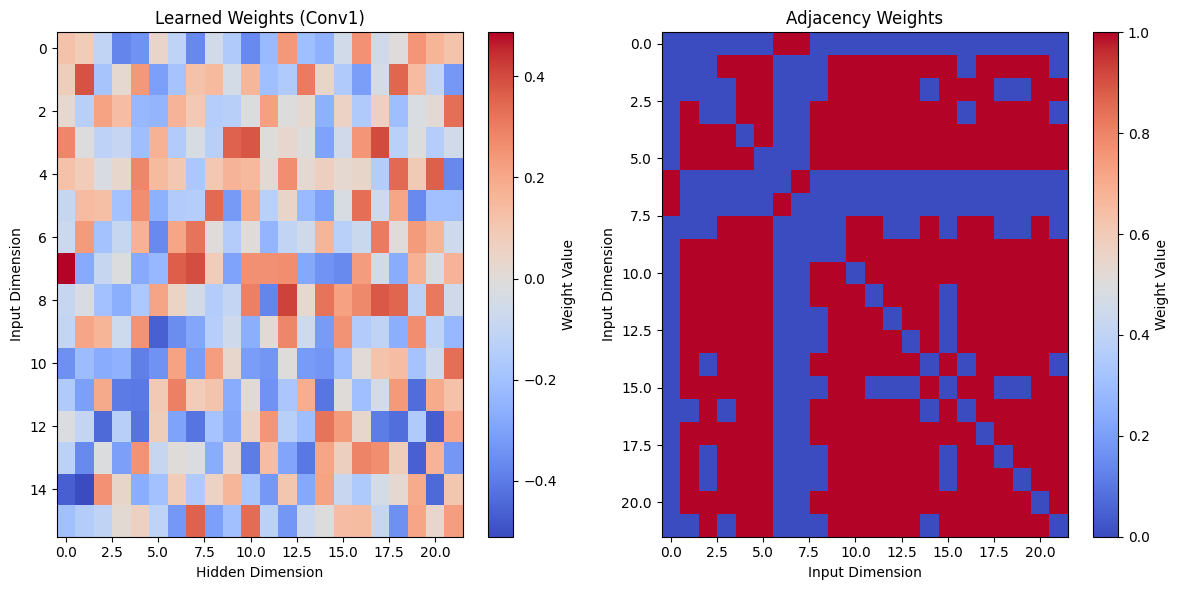

In [10]:
# Extract weights from the first GCN convolution layer
learned_weights_conv1 = model.conv1.lin.weight.detach().numpy()

# Print the learned weights from GCN layers and the adjacency matrix
print("Learned Weights from Conv1:")
print(learned_weights_conv1)
print("Adjacency Weights:")
print(adjacency_matrix)


import matplotlib.pyplot as plt

# Set up a plot for comparing learned weights and adjacency matrix
plt.figure(figsize=(12, 6))

# Plot learned weights from the first GCN layer
plt.subplot(1, 2, 1)
plt.imshow(learned_weights_conv1, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Weight Value')
plt.title('Learned Weights (Conv1)')
plt.xlabel('Hidden Dimension')
plt.ylabel('Input Dimension')

# Plot the adjacency matrix
plt.subplot(1, 2, 2)
plt.imshow(adjacency_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar(label='Weight Value')
plt.title('Adjacency Weights')
plt.xlabel('Input Dimension')
plt.ylabel('Input Dimension')

plt.tight_layout()
plt.show()


# Provide External Data here

In [11]:
external_test_data = pd.read_csv('test.csv')
external_test_data.head()

,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,Temp5,...,Temp7,Temp8,TempC9,FlowC2,Temp9,Temp10,FlowC3,FlowC4,Temp12,VapourPressure
0,114.4047,281.6030,406.7400,100.1649,528.0807,526.3920,119.2140,124.5994,250.2161,418,...,1136.1923,527.5541,57.4533,80.5233,507.3149,547.1328,6.8928,9.0651,526.1437,27.0864
1,143.0868,370.6435,397.6131,90.5532,526.3503,524.8129,191.0229,197.4386,239.9495,418,...,1179.2026,539.7538,75.6800,73.6267,496.8015,545.8074,8.0423,9.9873,524.4699,25.1560
2,143.0868,370.6435,397.6131,90.5532,529.0000,524.8129,191.0229,197.4386,239.9495,418,...,1179.2026,539.7538,75.6800,73.6267,496.8015,545.8074,8.0423,9.9873,524.4699,25.1560
3,143.0868,370.6435,397.6131,90.5532,520.0000,524.8129,191.0229,197.4386,239.9495,418,...,1179.2026,539.7538,75.6800,73.6267,496.8015,545.8074,8.0423,9.9873,524.4699,25.1560
4,143.0868,370.6435,397.6131,90.5532,519.0000,524.8129,191.0229,197.4386,239.9495,418,...,1179.2026,539.7538,75.6800,73.6267,496.8015,545.8074,8.0423,9.9873,524.4699,25.1560


In [12]:
print(len(external_test_data.columns))

22


In [13]:
# normalize external testing data
normalized_external_test_data = scaler.transform(external_test_data.values)
normalized_external_test_data.shape

(21, 22)

In [14]:
import torch
from torch_geometric.data import Data

# Define the number of nodes based on the test set
num_test_nodes = normalized_external_test_data.shape[0]

# Filter edge indices based on the available nodes in the test data
valid_edge_mask = (edge_index_tensor[0] < num_test_nodes) & (edge_index_tensor[1] < num_test_nodes)
filtered_edge_index = edge_index_tensor[:, valid_edge_mask]

In [15]:
# Use the filtered edge index in the Data object
normalized_external_test_data = Data(x=torch.tensor(normalized_external_test_data, dtype=torch.float32),
                          edge_index=filtered_edge_index)

In [16]:
threshold_percentile = 90

with torch.no_grad():
    external_test_output = model(normalized_external_test_data)
    mse_per_sensor_external = torch.mean((normalized_external_test_data.x - external_test_output)**2, dim=0)

In [17]:
import torch
import matplotlib.pyplot as plt
import networkx as nx

# Sorting and threshold calculation
mse_sorted, _ = torch.sort(mse_per_sensor_external)
threshold_index = int((threshold_percentile / 100) * len(mse_sorted))
minimum_threshold = 0.3  # Adjust as needed
threshold_external = max(mse_sorted[threshold_index], minimum_threshold)

# Identify anomalous indices
anomalous_indices_external = torch.nonzero(mse_per_sensor_external > threshold_external).squeeze().tolist()

# Convert indices to list if needed
if not isinstance(anomalous_indices_external, list):
    anomalous_indices_external = [anomalous_indices_external]

# Extract sensor names from the dataset columns
sensor_names = external_test_data.columns.tolist()

# Print MSE and anomaly details
print("MSE per sensor (external testing data):", mse_per_sensor_external.tolist())
print("Anomalous sensor names, indices, and MSE (external testing data):")
for idx in anomalous_indices_external:
    print(f"Sensor Index: {idx}, Name: {sensor_names[idx]}, MSE: {mse_per_sensor_external[idx].item()}")

print(f"Dynamic Threshold for anomaly detection (percentile-based): {threshold_external}")


MSE per sensor (external testing data): [0.03677143529057503, 0.005681920796632767, 0.12405984848737717, 0.00359540618956089, 0.14515933394432068, 0.1951703578233719, 0.027657270431518555, 0.030677443370223045, 0.008104625158011913, 0.32544705271720886, 0.2047000378370285, 0.010617714375257492, 0.161266028881073, 0.14558860659599304, 0.003818886587396264, 0.016439493745565414, 0.1560305655002594, 0.1902216076850891, 0.031882647424936295, 0.03986280784010887, 0.18611378967761993, 0.07639633119106293]
Anomalous sensor names, indices, and MSE (external testing data):
Sensor Index: 9, Name: Temp5, MSE: 0.32544705271720886
Dynamic Threshold for anomaly detection (percentile-based): 0.3


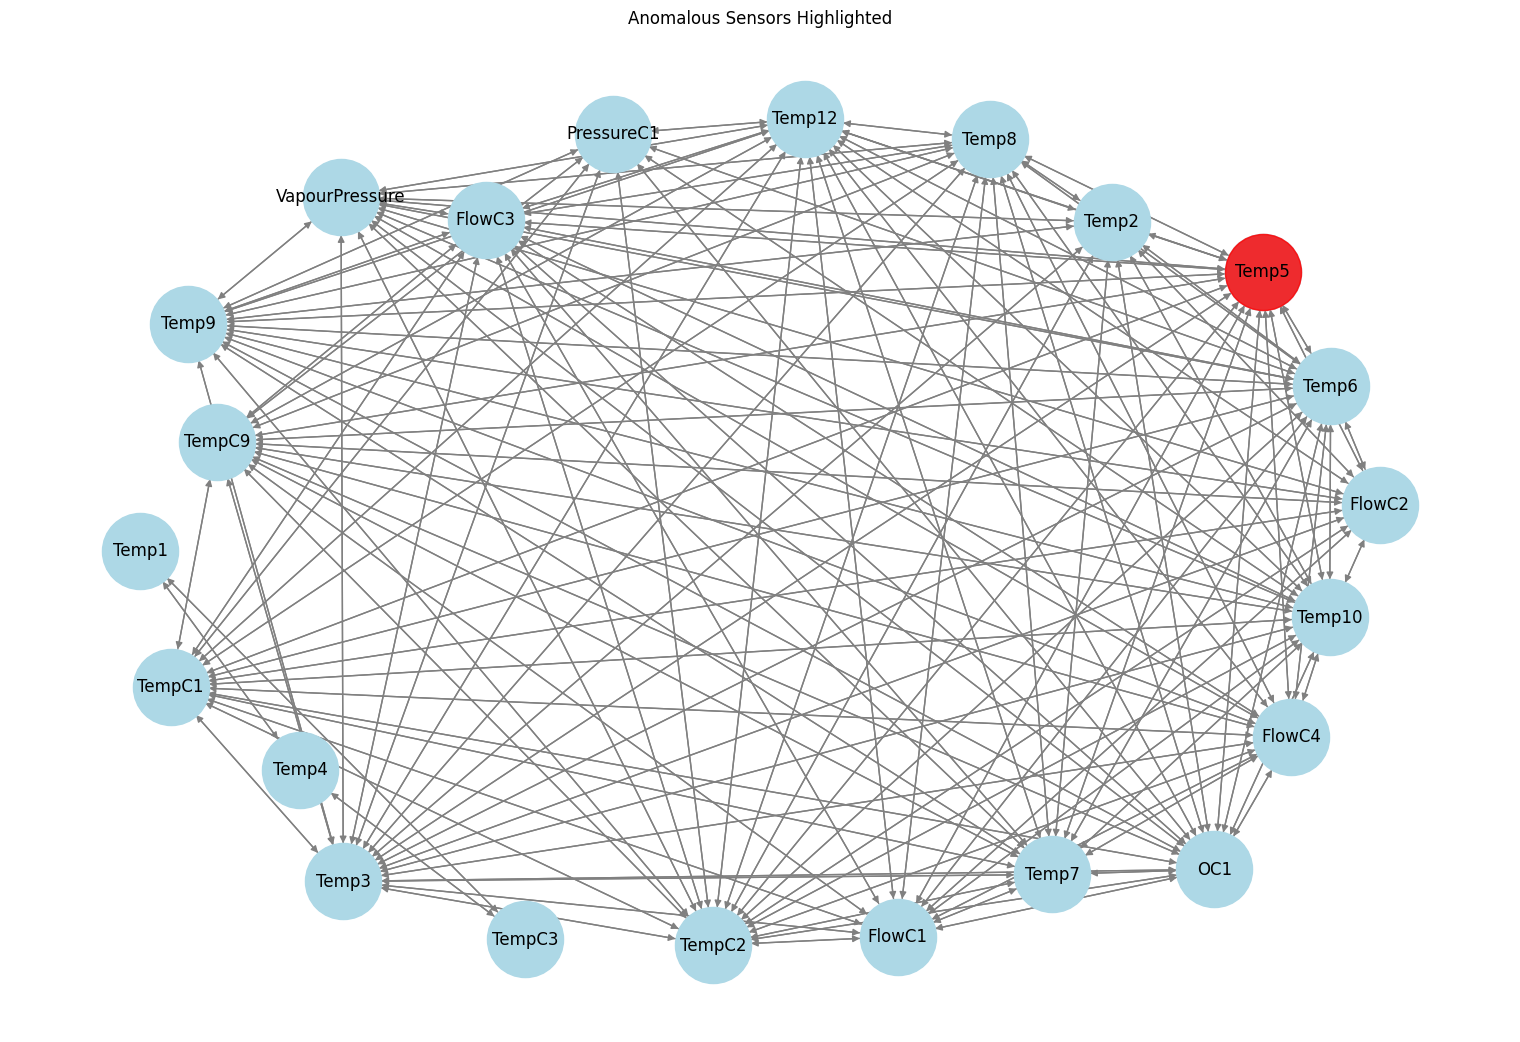

In [18]:
# Draw the graph using NetworkX
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, k=6)  # Adjust layout as needed
nx.draw(G, pos, with_labels=False, node_size=3000, font_size=12, arrows=True, node_color='lightblue', edge_color='gray')

# Highlight anomalous sensors
for idx in anomalous_indices_external:
    if idx in G.nodes():  # Check if index is in the graph
        nx.draw_networkx_nodes(G, pos, nodelist=[idx], node_color='red', node_size=3000, alpha=0.8)

# Ensure that node labels match the node indices in G
node_labels = {node: sensor_names[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

plt.title("Anomalous Sensors Highlighted")
plt.show()
